In [152]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

X = pd.read_csv("C:/Users/Administrator/Desktop/PFE/data/new/miscplants_Xp.csv", sep=';')
Y = pd.read_csv("C:/Users/Administrator/Desktop/PFE/data/new/miscplants_Y.csv", sep=';')
M = pd.read_csv("C:/Users/Administrator/Desktop/PFE/data/new/miscplants_M.csv", sep=';', na_values ='missing')


In [ ]:
# Print column names
print("\nColumn names:")
print(X.columns)
# Print number of columns
print(f"\nNumber of columns: {X.shape[1]}")
print(f"\nNumber of rows: {X.shape[0]}")



Column names:
Index(['1100', '1102', '1104', '1106', '1108', '1110', '1112', '1114', '1116',
       '1118',
       ...
       '2480', '2482', '2484', '2486', '2488', '2490', '2492', '2494', '2496',
       '2498'],
      dtype='object', length=700)

Number of columns: 700

Number of rows: 1608


In [23]:
# Generate descriptive statistics
print("\nDescriptive analysis:")
print(X.describe())



Descriptive analysis:
              1100         1102         1104         1106         1108  \
count  1608.000000  1608.000000  1608.000000  1608.000000  1608.000000   
mean     -0.000348    -0.000289    -0.000180    -0.000040     0.000098   
std       0.000418     0.000396     0.000328     0.000229     0.000129   
min      -0.003419    -0.003155    -0.002496    -0.001556    -0.000635   
25%      -0.000475    -0.000415    -0.000289    -0.000124     0.000039   
50%      -0.000261    -0.000212    -0.000123    -0.000012     0.000100   
75%      -0.000078    -0.000034     0.000027     0.000103     0.000169   
max       0.000302     0.000393     0.000478     0.000543     0.000571   

              1110         1112         1114         1116         1118  ...  \
count  1608.000000  1608.000000  1608.000000  1608.000000  1608.000000  ...   
mean      0.000191     0.000201     0.000214     0.000236     0.000259  ...   
std       0.000077     0.000087     0.000096     0.000102     0.000104  .

In [12]:
print("\nColumn names:")
print(Y.columns)
# Print number of columns
print(f"\nNumber of columns: {Y.shape[1]}")
print(f"\nNumber of rows: {Y.shape[0]}")


Column names:
Index(['adf', 'adl', 'cf', 'cp', 'dmdcell', 'ndf'], dtype='object')

Number of columns: 6

Number of rows: 1608


In [160]:
# Generate frequency table for each column in M
frequency_table = M.apply(pd.Series.value_counts).fillna(0).astype(int)

# Print the frequency table
print(frequency_table)

      adf  adl   cf   cp  dmdcell  ndf
cal   861  800  500  880      820  860
test  382  356  222  391      365  382
val   287  267  166  293      274  287


In [ ]:
from ydata_profiling import ProfileReport
import ipywidgets

profile = ProfileReport(Y, title="Profiling Report")
profile.to_notebook_iframe()

# M part

In [31]:
print(M.describe())

         adf   adl   cf    cp dmdcell   ndf
count   1530  1423  888  1564    1459  1529
unique     3     3    3     3       3     3
top      cal   cal  cal   cal     cal   cal
freq     861   800  500   880     820   860


<Figure size 1000x600 with 0 Axes>

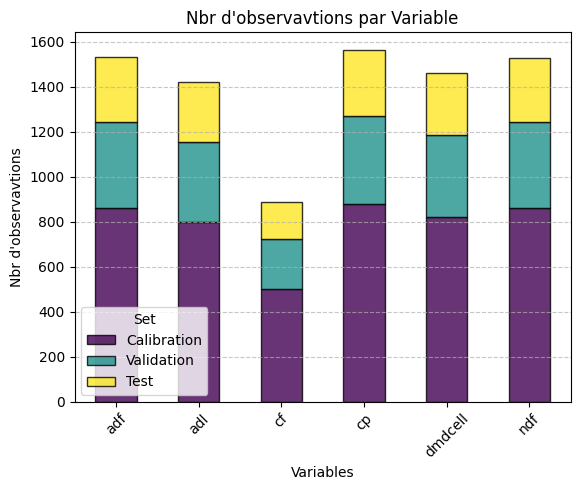

In [19]:
# Plot bar graph
counts = M.apply(pd.Series.value_counts).T  # Transpose to get variables as index


plt.figure(figsize=(10, 6))
counts.plot(kind="bar", stacked=True, colormap="viridis", edgecolor="black", alpha=0.8)

plt.xlabel("Variables")
plt.ylabel("Nbr d'observavtions")
plt.title("Nbr d'observavtions par Variable")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Set", labels=["Calibration", "Validation", "Test"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


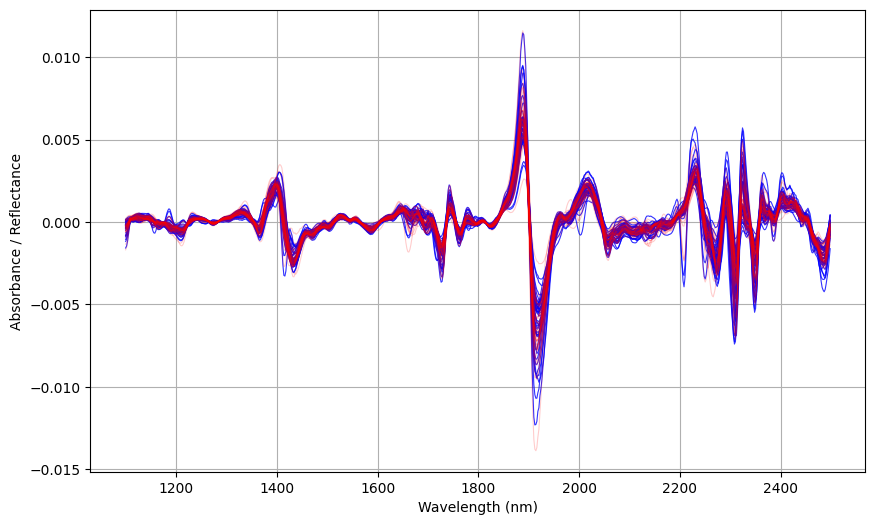

In [80]:
# Plot wavelength
num_samples = 40
train_samples = X_train.sample(n=min(num_samples, len(X_train)), random_state=42)
test_samples = X_test.sample(n=min(num_samples, len(X_test)), random_state=42)

wavelengths = np.arange(1100, 1100 + X_train.shape[1] * 2, 2)  

# Plot spectral curves
plt.figure(figsize=(10, 6))

for _, row in train_samples.iterrows():
    plt.plot(wavelengths, row, color='blue', alpha=0.8, linewidth=0.8)

for _, row in test_samples.iterrows():
    plt.plot(wavelengths, row, color='red', alpha=0.2, linewidth=0.8)


plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance / Reflectance")
# plt.legend(["Training (Cal + Val)", "Test"])
plt.grid(True)

plt.show()

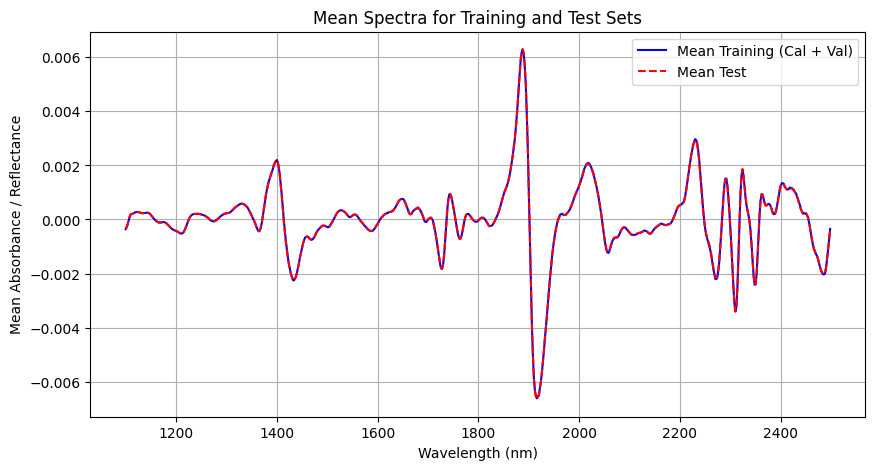

In [ ]:
# Moyen pour chaque wavelenght pour comparer
mean_train = X_train.mean(axis=0)
mean_test = X_test.mean(axis=0)

# Generate wavelength values assuming 2nm intervals
wavelengths = np.arange(1100, 1100 + X_train.shape[1] * 2, 2)

# Plot the mean spectra
plt.figure(figsize=(10, 5))
plt.plot(wavelengths, mean_train, label="Mean Training (Cal + Val)", color='blue')
plt.plot(wavelengths, mean_test, label="Mean Test", color='red', linestyle='dashed')

# Labels and styling
plt.xlabel("Wavelength (nm)")
plt.ylabel("Mean Absorbance / Reflectance")
plt.title("Mean Spectra for Training and Test Sets")
plt.legend()
plt.grid(True)

plt.show()

# Exploratory data analysis

In [8]:
def split_data(Var):

    if Var not in Y.columns or Var not in M.columns:
        raise ValueError(f"Errer Erreur Erreur ! ! !")

    mask = M[Var]

    # Split X and Y based on M.csv values
    X_cal = X[mask == 'cal']
    Y_cal = Y.loc[X_cal.index, Var]

    X_val = X[mask == 'val']
    Y_val = Y.loc[X_val.index, Var]

    X_test = X[mask == 'test']
    Y_test = Y.loc[X_test.index, Var]

    return (X_cal, Y_cal), (X_val, Y_val), (X_test, Y_test)

In [130]:
def perform_pca(X_cal, X_val, X_test, var):
    # Merge calibration and validation sets to create the training set
    X_train = pd.concat([X_cal, X_val])

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=10) 
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Explained variance per component
    explained_variance = pca.explained_variance_ratio_

    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # PCA Projection Plot
    axes[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.9, color='blue', label="Training (Cal + Val)")
    axes[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.6, color='red', label="Test")
    axes[0].set_xlabel("PC 1")
    axes[0].set_ylabel("PC 2")
    axes[0].set_title("Plan principal pour Training et Test (variable = {})".format(var))
    axes[0].legend()
    axes[0].grid(True)

    # Explained Variance Plot
    axes[1].plot(range(1, len(explained_variance) + 1), explained_variance, color='black', alpha=0.7, marker = 'o')
    axes[1].set_xlabel("Nbr de Composante Principale")
    axes[1].set_ylabel("Variance Expliquée")
    axes[1].set_title("Variance Expliquée par Composante")
    axes[1].grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_histogram(Y_cal, Y_val, Y_test, var):

    Y_train = pd.concat([Y_cal, Y_val])
    _, p_train = shapiro(Y_train)
    _, p_test = shapiro(Y_test)

    mean_train = Y_train.mean()
    mean_test = Y_test.mean()

    plt.figure(figsize=(10, 6))
    
    # Plot histograms with KDE
    sns.histplot(Y_train, color='blue', alpha=0.7, 
                 label="Training (Cal + Val)", kde=True, bins=30)
    sns.histplot(Y_test, color='red', alpha=0.5, 
                 label="Test", kde=True, bins=30)

    # Add mean lines
    plt.axvline(mean_train, color='blue', linestyle='dashed', linewidth=1.5, 
                label=f"Mean Train: {mean_train:.2f}")
    plt.axvline(mean_test, color='red', linestyle='dashed', linewidth=1.5, 
                label=f"Mean Test: {mean_test:.2f}")

    # Add p-value annotations
    textstr = '\n'.join((
        f'Train p-value: {p_train:.3f}',
        f'Test p-value: {p_test:.3f}'))
    
    plt.gca().text(0.75, 0.95, textstr, transform=plt.gca().transAxes,
                   fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', 
                   facecolor='white', alpha=0.8))

    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.title(f"Distribution of {var} with Normality Test p-values")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [158]:
Var = 'adf'

(X_cal, Y_cal), (X_val, Y_val), (X_test, Y_test) = split_data(Var)
Y_train = pd.concat([Y_cal, Y_val])
X_train = pd.concat([X_cal, X_val])

# Summary statistics
summary_stats = pd.DataFrame({
    "Training (Cal + Val)": Y_train.describe(),
    "Test": Y_test.describe()
})
print("Statistiaues:\n", summary_stats)

Statistiaues:
        Training (Cal + Val)        Test
count           1148.000000  382.000000
mean              33.221063   33.231597
std                9.884037    9.997747
min                9.200000    8.770000
25%               25.590000   25.587500
50%               32.945000   32.940000
75%               39.832500   39.862500
max               65.980000   66.910000


# ACP

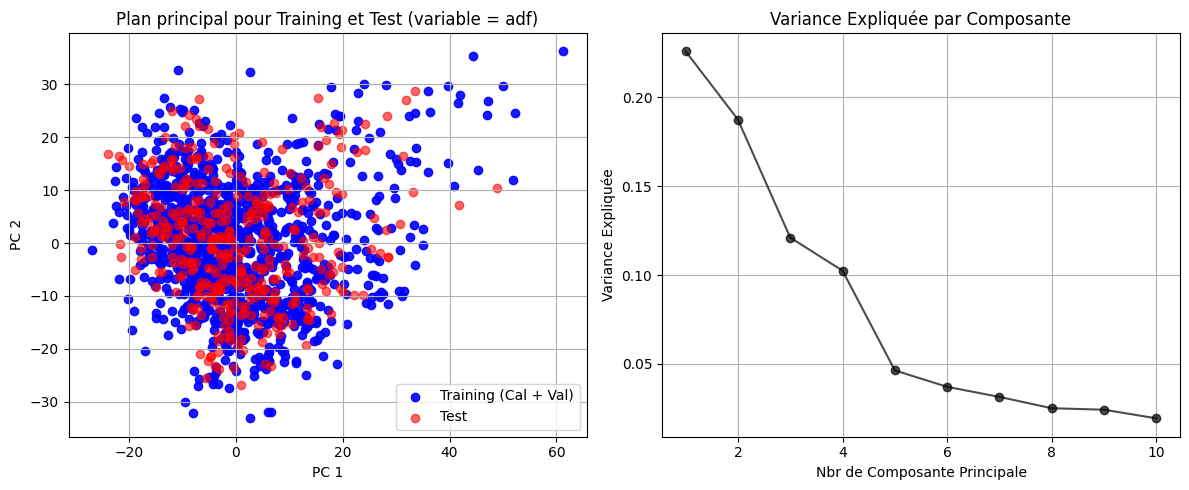

In [159]:
perform_pca(X_cal, X_val, X_test, Var)

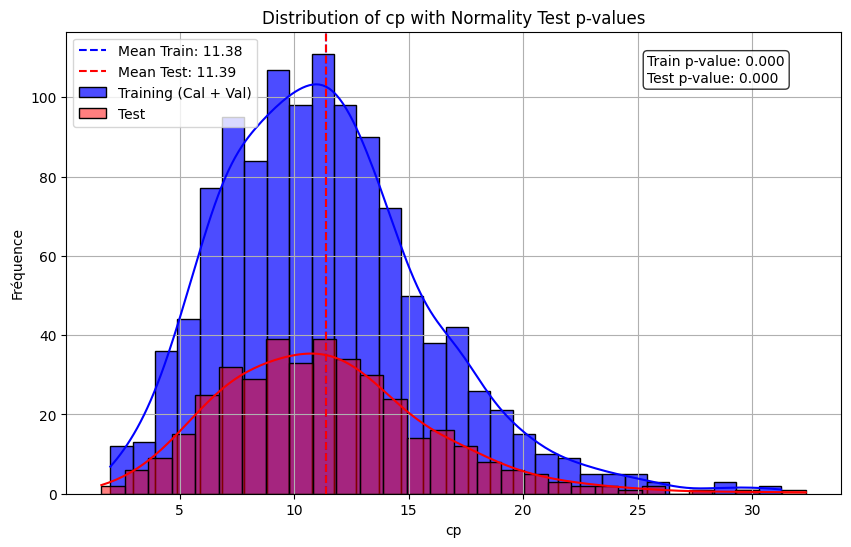

In [155]:
plot_histogram(Y_cal, Y_val, Y_test, Var)

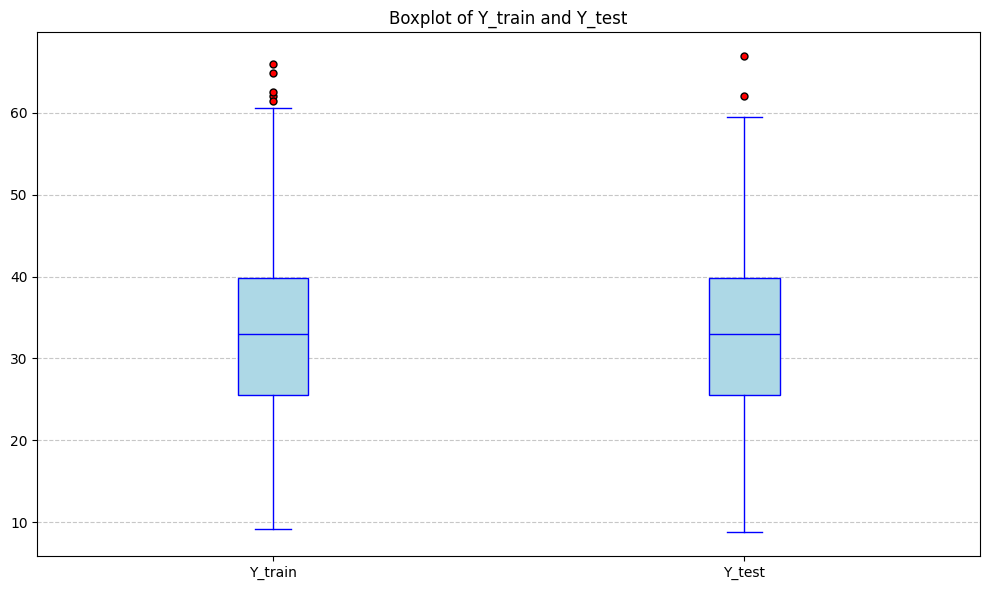

In [144]:
# boxplots
plt.figure(figsize=(10, 6))

plt.boxplot([Y_train, Y_test], labels=['Y_train', 'Y_test'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'), medianprops=dict(color='blue'), flierprops=dict(marker='o', markerfacecolor='red', markersize=5))

plt.title('Boxplot of Y_train and Y_test')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pairplot pour tt les Vars

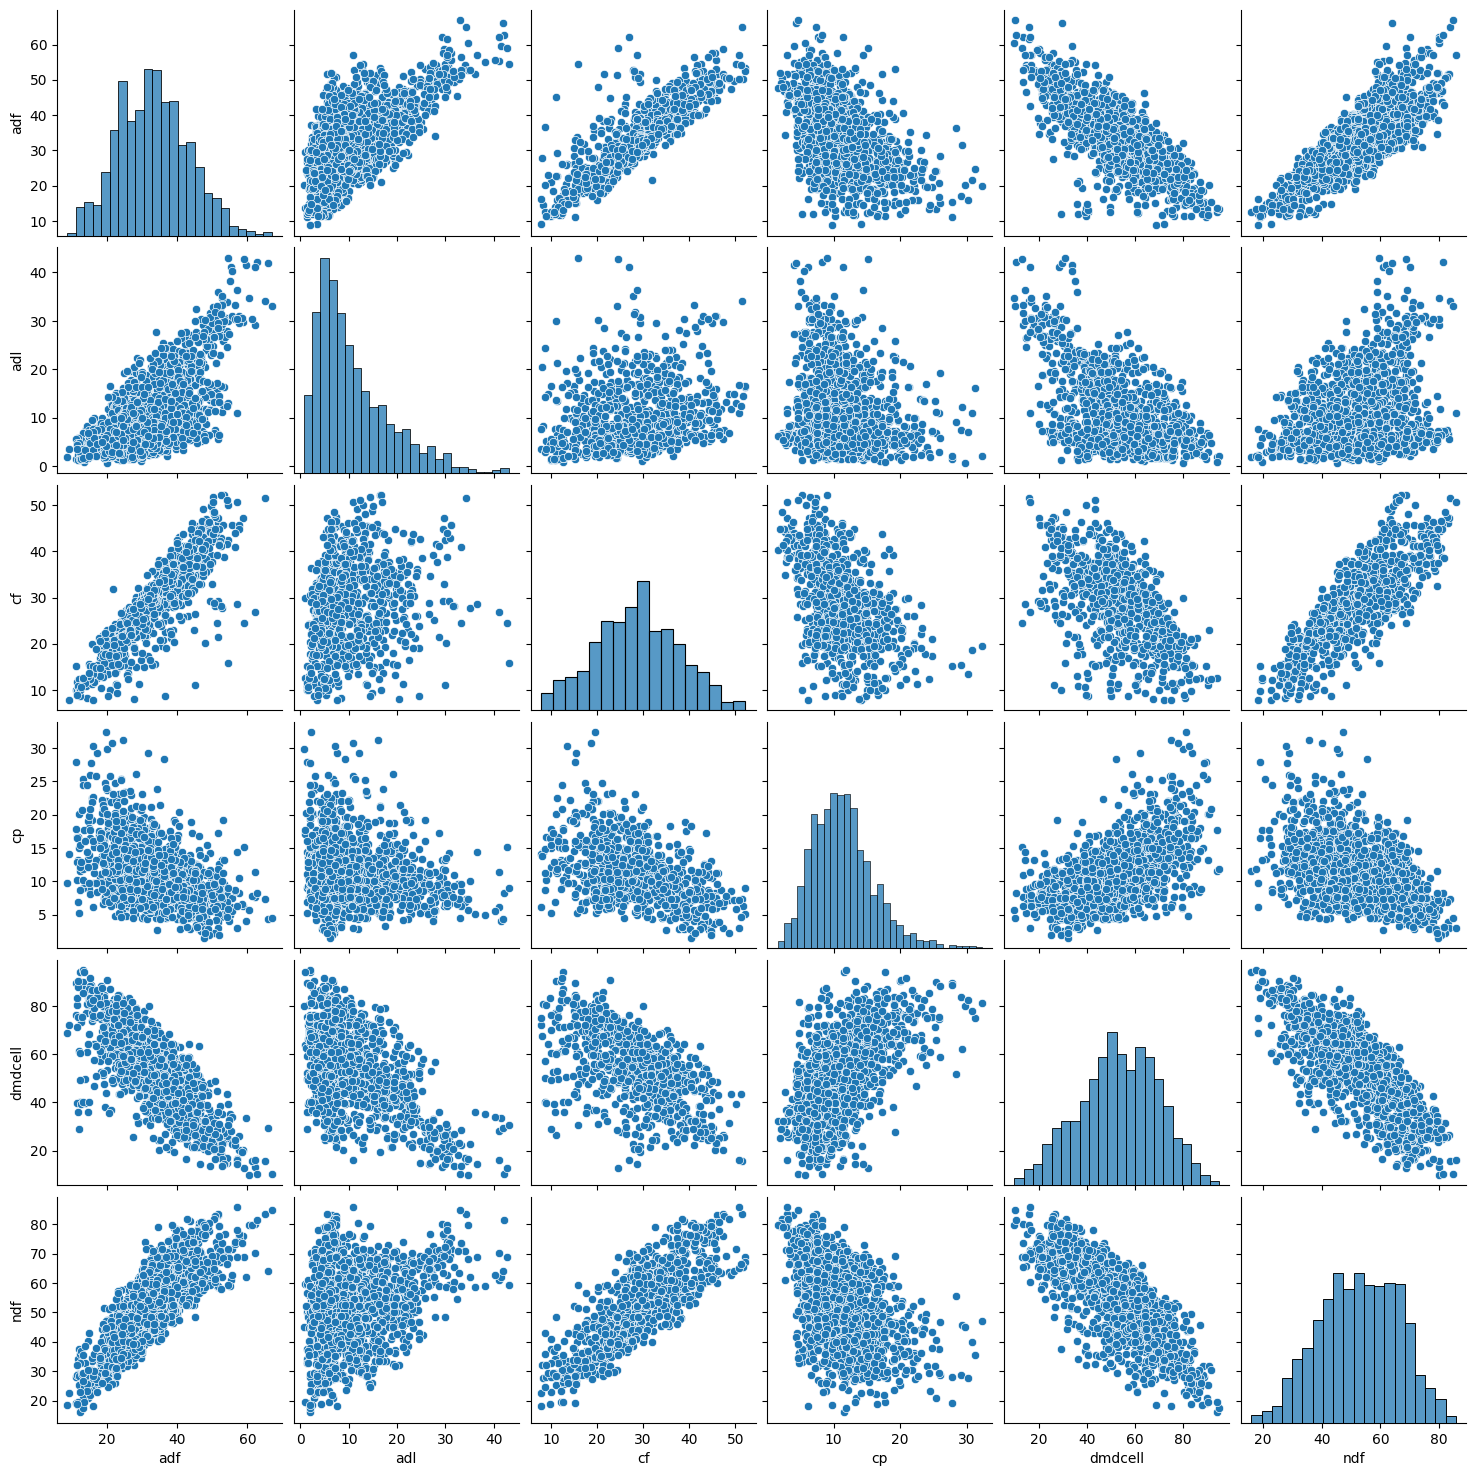

In [145]:
sns.pairplot(Y, diag_kind='hist')

# Show the plot
plt.show()